In [1]:
%pip install opendatasets

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\hp\OneDrive\Desktop\machine_learning\ml\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import opendatasets as ods 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import set_config
import warnings
import scipy.stats as st 
from sklearn.model_selection import cross_val_score
import os, pickle
warnings.simplefilter('ignore')
set_config(display='diagram')
sns.set_style('darkgrid')

In [3]:
ods.download('https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset', '.')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kareemakompf
Your Kaggle Key: ········


100%|███████████████████████████████████████████████████████████████████████████████| 480k/480k [00:00<00:00, 6.54MB/s]

In [2]:
hotel  = pd.read_csv('./hotel-reservations-classification-dataset/Hotel Reservations.csv', index_col='Booking_ID')
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36275 entries, INN00001 to INN36275
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_seg

In [3]:
train_X, test_X, train_y, test_y = train_test_split(hotel.iloc[:, :-1], hotel.iloc[:, -1], test_size=0.2, random_state=0)

In [4]:
train = pd.concat([train_X, train_y], axis=1)

<Figure size 432x288 with 0 Axes>

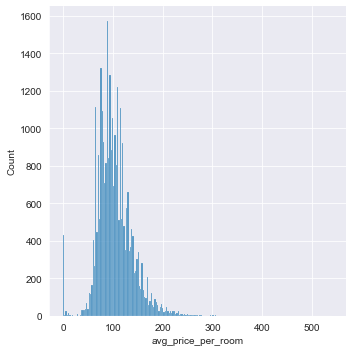

<Figure size 432x288 with 0 Axes>

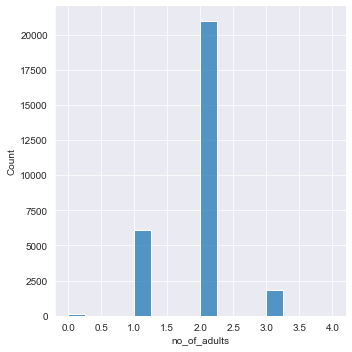

<Figure size 432x288 with 0 Axes>

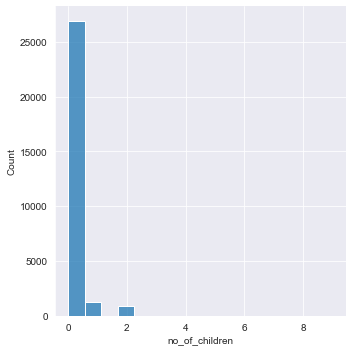

<Figure size 432x288 with 0 Axes>

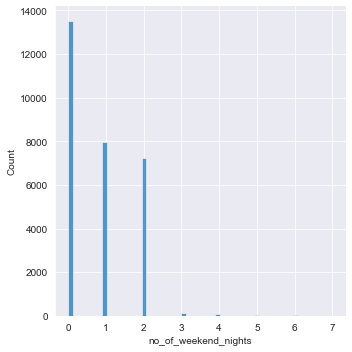

<Figure size 432x288 with 0 Axes>

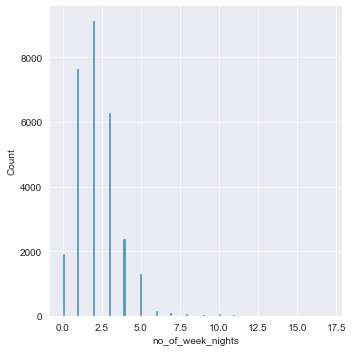

<Figure size 432x288 with 0 Axes>

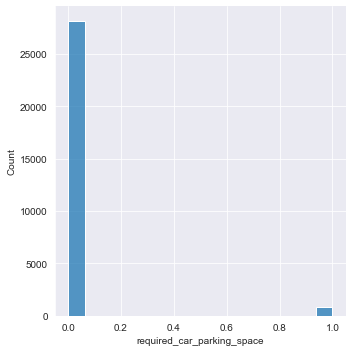

<Figure size 432x288 with 0 Axes>

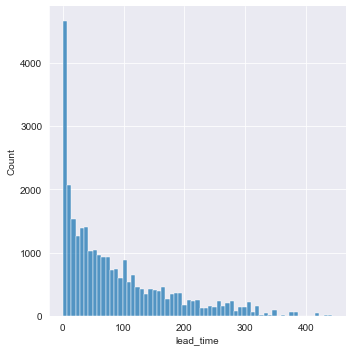

<Figure size 432x288 with 0 Axes>

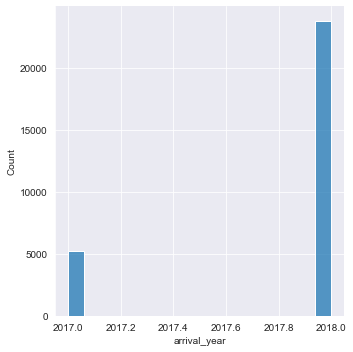

<Figure size 432x288 with 0 Axes>

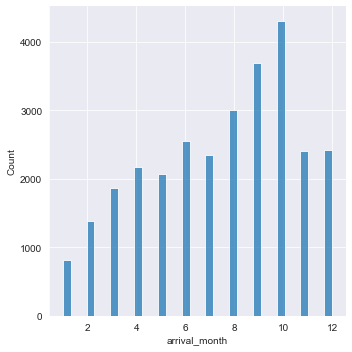

<Figure size 432x288 with 0 Axes>

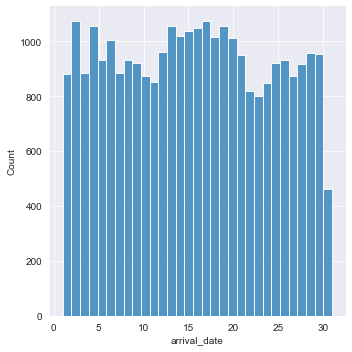

<Figure size 432x288 with 0 Axes>

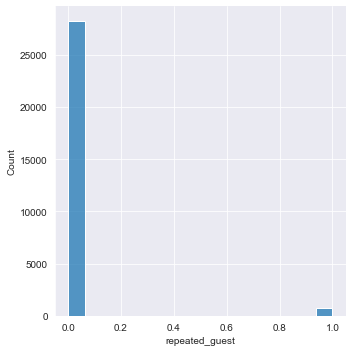

<Figure size 432x288 with 0 Axes>

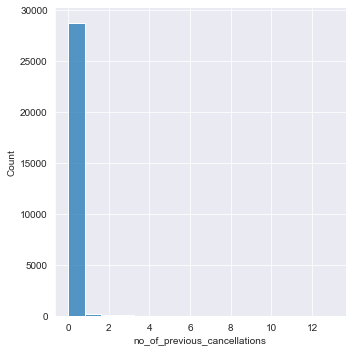

<Figure size 432x288 with 0 Axes>

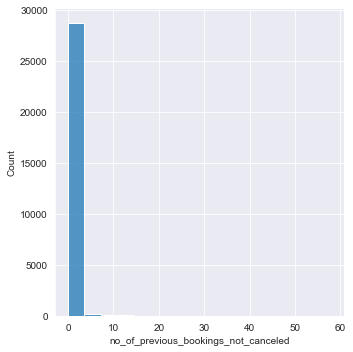

<Figure size 432x288 with 0 Axes>

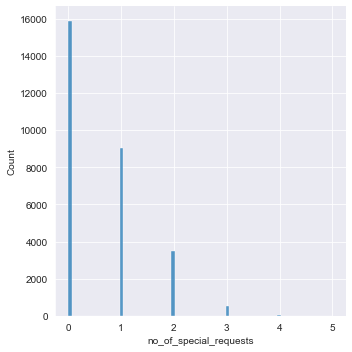

In [5]:
numericals = list(train.select_dtypes(float).columns) + list(train.select_dtypes(int))

for col in numericals: 
  plt.figure()
  sns.displot(x = col, data = train)
  plt.show()

#Standard Scaler to price per room, required car parking space and Function transformer to Lead time. 
#OrdinalEncoder to year

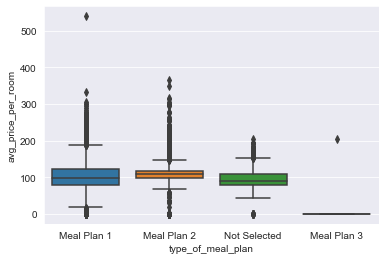

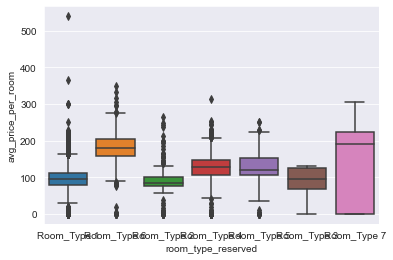

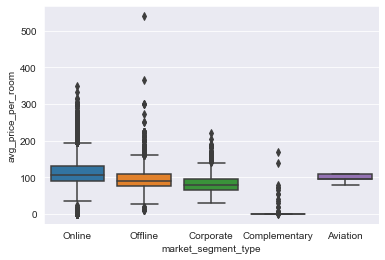

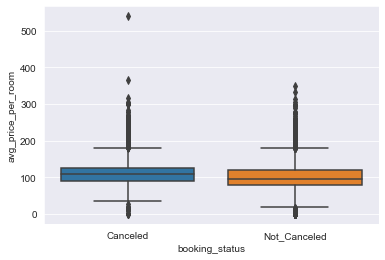

In [6]:
categoricals = train.select_dtypes(object).columns 

for cat in categoricals: 
  plt.figure()
  sns.boxplot(y = 'avg_price_per_room', x = cat, data= train)
  plt.show()

#OneHotEncode all, Labelencode the label. 

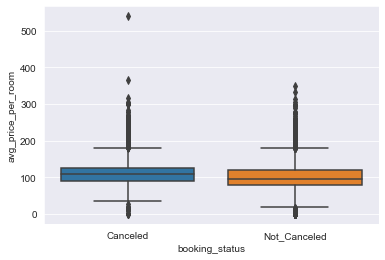

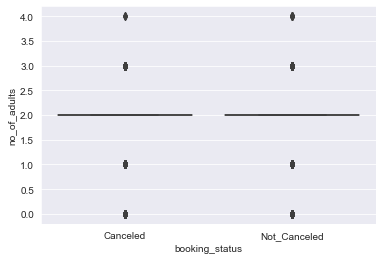

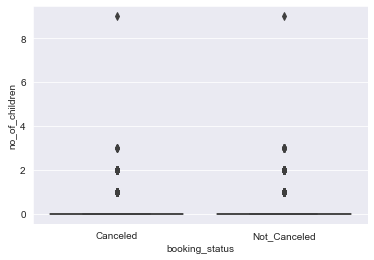

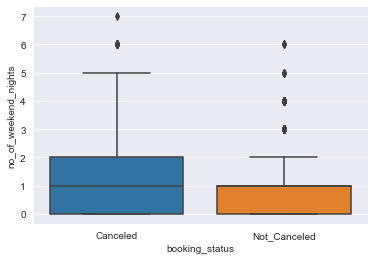

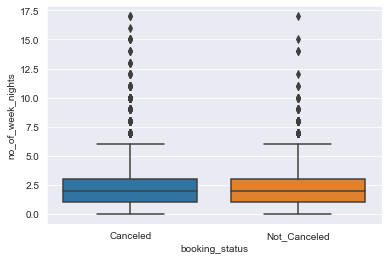

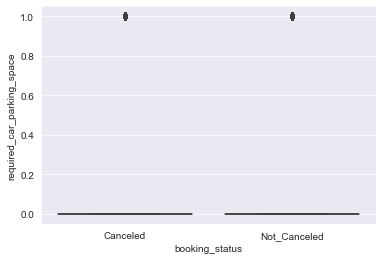

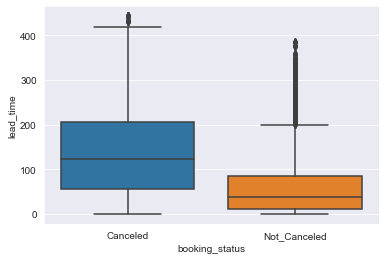

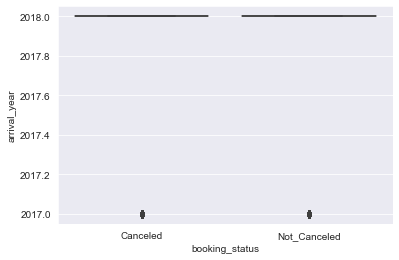

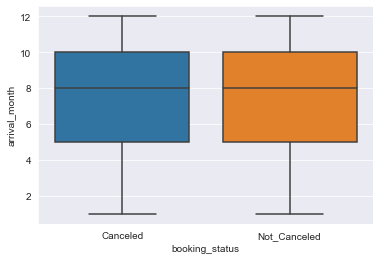

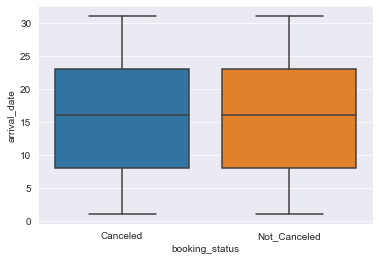

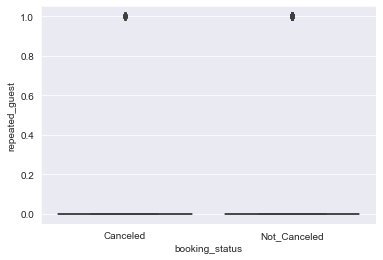

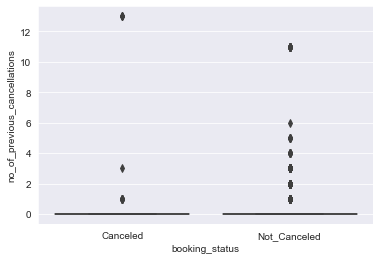

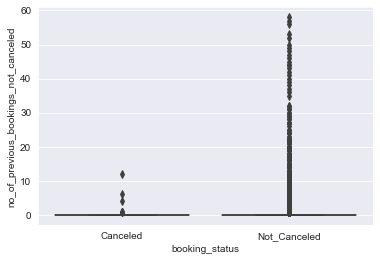

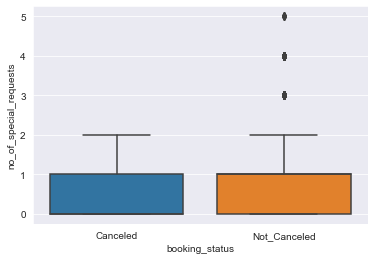

In [7]:
for col in numericals: 
  plt.figure()
  sns.boxplot(x = 'booking_status', y = col, data = train)
  plt.show()

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

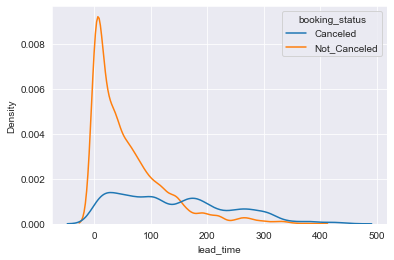

In [8]:
sns.kdeplot(x = 'lead_time', hue='booking_status', data = train)

<AxesSubplot:xlabel='avg_price_per_room', ylabel='Density'>

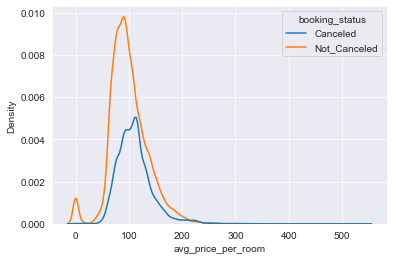

In [9]:
sns.kdeplot(x = 'avg_price_per_room', hue='booking_status', data = train)

<AxesSubplot:xlabel='lead_time', ylabel='avg_price_per_room'>

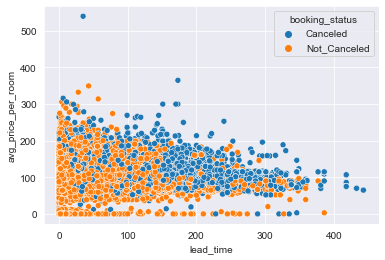

In [10]:
sns.scatterplot(x = 'lead_time', y = 'avg_price_per_room', data = train, hue = 'booking_status')

<AxesSubplot:xlabel='no_of_weekend_nights', ylabel='Density'>

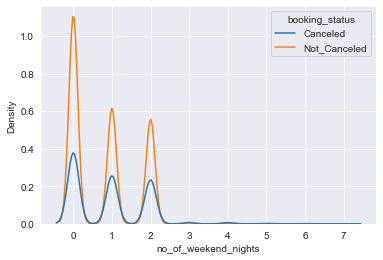

In [11]:
sns.kdeplot(x = 'no_of_weekend_nights', hue='booking_status', data = train)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29020 entries, INN26818 to INN02733
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   type_of_meal_plan                     29020 non-null  object 
 5   required_car_parking_space            29020 non-null  int64  
 6   room_type_reserved                    29020 non-null  object 
 7   lead_time                             29020 non-null  int64  
 8   arrival_year                          29020 non-null  int64  
 9   arrival_month                         29020 non-null  int64  
 10  arrival_date                          29020 non-null  int64  
 11  market_seg

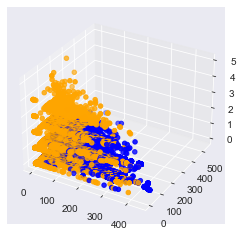

In [13]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection = '3d')

def colors(status):
  if status == "Canceled":
    return "blue"
  else:
    return "orange"

colors = train.booking_status.apply(colors)

ax.scatter( train['lead_time'],train['avg_price_per_room'], train['no_of_special_requests'], c = colors)

plt.show()

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29020 entries, INN26818 to INN02733
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   type_of_meal_plan                     29020 non-null  object 
 5   required_car_parking_space            29020 non-null  int64  
 6   room_type_reserved                    29020 non-null  object 
 7   lead_time                             29020 non-null  int64  
 8   arrival_year                          29020 non-null  int64  
 9   arrival_month                         29020 non-null  int64  
 10  arrival_date                          29020 non-null  int64  
 11  market_seg

In [15]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29020 entries, INN26818 to INN02733
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   type_of_meal_plan                     29020 non-null  object 
 5   required_car_parking_space            29020 non-null  int64  
 6   room_type_reserved                    29020 non-null  object 
 7   lead_time                             29020 non-null  int64  
 8   arrival_year                          29020 non-null  int64  
 9   arrival_month                         29020 non-null  int64  
 10  arrival_date                          29020 non-null  int64  
 11  market_seg

In [16]:
# Creating the pipeline 

preprocess = ColumnTransformer([
    ('pass_a', 'passthrough', [0, 1, 2, 3]), 
    ('meal_plan_encode', OneHotEncoder(drop='first', sparse=False), [4]), 
    ('scale_avg_space', StandardScaler(), [5]), 
    ('room_type_encode', OneHotEncoder(drop='first', sparse=False), [6]), 
    ('pass_c', 'passthrough', [7, 8, 9, 10]),
    ('market_segment_encode', OneHotEncoder(drop='first', sparse=False), [11]), 
    ('pass_d', 'passthrough', [12, 13, 14]), 
    ('scale_avg_price', StandardScaler(), [15])
], remainder='passthrough')

func_transform = ColumnTransformer([
    ('pass', 'passthrough', slice(0, 6)), 
    ('transform_func', FunctionTransformer(func=np.log1p), [7])
], remainder='passthrough'
)

model = DecisionTreeClassifier()

pipe = Pipeline([
    ('transform', preprocess),
    ('func_transform', func_transform), 
    ('model', model)
]
)

pipe.fit(train_X, train_y)


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pass_a', 'passthrough',
                                                  [0, 1, 2, 3]),
                                                 ('meal_plan_encode',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [4]),
                                                 ('scale_avg_space',
                                                  StandardScaler(), [5]),
                                                 ('room_type_encode',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [6]),
                                                 ('pass_c', 'passthrough',
                                                  [7, 8, 9, 10]),
                                                 ('market_segment_encode',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [11]),
                                                 ('pass_d', 'passthrough',
                                                  [12, 13, 14]),
                                                 ('scale_avg_price',
                                                  StandardScaler(), [15])])),
                ('func_transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pass', 'passthrough',
                                                  slice(0, 6, None)),
                                                 ('transform_func',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  [7])])),
                ('model', DecisionTreeClassifier())])

In [17]:
pipe.score(test_X, test_y)

0.8689179875947622

In [18]:
ft = FunctionTransformer(func=np.log1p)
ft.fit(train_X['lead_time'])

FunctionTransformer(func=<ufunc 'log1p'>)

<AxesSubplot:>

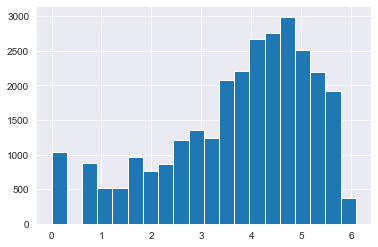

In [19]:
ft.transform(train_X.lead_time).hist(bins=20)

In [20]:
pipe

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pass_a', 'passthrough',
                                                  [0, 1, 2, 3]),
                                                 ('meal_plan_encode',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [4]),
                                                 ('scale_avg_space',
                                                  StandardScaler(), [5]),
                                                 ('room_type_encode',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [6]),
                                                 ('pass_c', 'passthrough',
                                                  [7, 8, 9, 10]),
                                                 ('market_segment_encode',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [11]),
                                                 ('pass_d', 'passthrough',
                                                  [12, 13, 14]),
                                                 ('scale_avg_price',
                                                  StandardScaler(), [15])])),
                ('func_transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pass', 'passthrough',
                                                  slice(0, 6, None)),
                                                 ('transform_func',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  [7])])),
                ('model', DecisionTreeClassifier())])

In [21]:
try:
    os.mkdir('MODELS')
except Exception as e:
    pass 

with open('MODELS/DecisionTreeClassifier_1.pkl', 'wb') as f:
    pickle.dump(pipe, f)

In [22]:
new_train = train.drop(columns=['no_of_adults', 'no_of_children', 'required_car_parking_space', 'arrival_year', 'arrival_date', 'booking_status'])

In [23]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29020 entries, INN26818 to INN02733
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_weekend_nights                  29020 non-null  int64  
 1   no_of_week_nights                     29020 non-null  int64  
 2   type_of_meal_plan                     29020 non-null  object 
 3   room_type_reserved                    29020 non-null  object 
 4   lead_time                             29020 non-null  int64  
 5   arrival_month                         29020 non-null  int64  
 6   market_segment_type                   29020 non-null  object 
 7   repeated_guest                        29020 non-null  int64  
 8   no_of_previous_cancellations          29020 non-null  int64  
 9   no_of_previous_bookings_not_canceled  29020 non-null  int64  
 10  avg_price_per_room                    29020 non-null  float64
 11  no_of_spec

In [24]:

preprocess_b = ColumnTransformer([
    ('pass_a', 'passthrough', [0, 1]), 
    ('encode_cols_a', OneHotEncoder(drop='first', sparse=False), [2, 3]), 
    ('pass_b', 'passthrough', [4, 5]), 
    ('encode_cols_b', OneHotEncoder(drop='first', sparse=False), [6]), 
    ('pass_c', 'passthrough', [7, 8, 9]),
    ('scale_avg_price', StandardScaler(), [10])
], remainder='passthrough')

func_transform_b = ColumnTransformer([
    ('pass', 'passthrough', slice(0, 3)), 
    ('transform_func', FunctionTransformer(func=np.log1p), [4])
], remainder='passthrough'
)

model_b = DecisionTreeClassifier()

pipe_b = Pipeline([
    ('transform', preprocess_b),
    ('func_transform', func_transform_b), 
    ('model', model_b)
]
)


pipe_b.fit(new_train, train_y)


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pass_a', 'passthrough',
                                                  [0, 1]),
                                                 ('encode_cols_a',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [2, 3]),
                                                 ('pass_b', 'passthrough',
                                                  [4, 5]),
                                                 ('encode_cols_b',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [6]),
                                                 ('pass_c', 'passthrough',
                                                  [7, 8, 9]),
                                                 ('scale_avg_price',
                                                  StandardScaler(), [10])])),
                ('func_transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pass', 'passthrough',
                                                  slice(0, 3, None)),
                                                 ('transform_func',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  [4])])),
                ('model', DecisionTreeClassifier())])

In [25]:
new_test = test_X.drop(columns=['no_of_adults', 'no_of_children', 'required_car_parking_space', 'arrival_year', 'arrival_date'])

In [26]:
pipe_b.score(new_test, test_y)

0.8623018607856651

In [27]:
new_train

,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
Booking_ID,,,,,,,,,,,,
INN26818,2,3,Meal Plan 1,Room_Type 1,244,10,Online,0,0,0,85.85,0
INN07538,0,3,Meal Plan 1,Room_Type 1,276,9,Online,0,0,0,95.00,0
INN06218,1,2,Meal Plan 1,Room_Type 1,233,10,Online,0,0,0,90.00,0
INN22884,2,2,Meal Plan 1,Room_Type 1,156,7,Online,0,0,0,93.08,1
INN28670,0,3,Meal Plan 1,Room_Type 1,76,4,Online,0,0,0,69.33,0
...,...,...,...,...,...,...,...,...,...,...,...,...
INN20758,2,5,Meal Plan 1,Room_Type 1,34,11,Online,0,0,0,74.80,2
INN32104,0,2,Meal Plan 2,Room_Type 1,346,9,Offline,0,0,0,115.00,1
INN30404,0,4,Meal Plan 1,Room_Type 4,175,8,Online,0,0,0,130.05,1


In [28]:
mean_b = np.nanmean(cross_val_score(pipe_b, new_test, test_y, scoring='accuracy', cv=31)) 

In [29]:
mean_a = np.nanmean(cross_val_score(pipe, test_X, test_y, scoring='accuracy', cv=31)) 

In [30]:
std_b = np.nanstd(cross_val_score(pipe_b, new_test, test_y, scoring='accuracy', cv=31)) 

In [31]:
std_a = np.nanstd(cross_val_score(pipe, test_X, test_y, scoring='accuracy', cv=31)) 

In [32]:
err = st.t.ppf(0.99, 30)

In [33]:
accuracy_interval_a = [mean_a - err*std_a, mean_a + err*std_a]

In [34]:
accuracy_interval_a = [mean_a - err*std_a, mean_a + err*std_a]

In [35]:
new_train

,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
Booking_ID,,,,,,,,,,,,
INN26818,2,3,Meal Plan 1,Room_Type 1,244,10,Online,0,0,0,85.85,0
INN07538,0,3,Meal Plan 1,Room_Type 1,276,9,Online,0,0,0,95.00,0
INN06218,1,2,Meal Plan 1,Room_Type 1,233,10,Online,0,0,0,90.00,0
INN22884,2,2,Meal Plan 1,Room_Type 1,156,7,Online,0,0,0,93.08,1
INN28670,0,3,Meal Plan 1,Room_Type 1,76,4,Online,0,0,0,69.33,0
...,...,...,...,...,...,...,...,...,...,...,...,...
INN20758,2,5,Meal Plan 1,Room_Type 1,34,11,Online,0,0,0,74.80,2
INN32104,0,2,Meal Plan 2,Room_Type 1,346,9,Offline,0,0,0,115.00,1
INN30404,0,4,Meal Plan 1,Room_Type 4,175,8,Online,0,0,0,130.05,1


In [36]:
new_train.room_type_reserved.unique()

array(['Room_Type 1', 'Room_Type 6', 'Room_Type 2', 'Room_Type 4',
       'Room_Type 5', 'Room_Type 3', 'Room_Type 7'], dtype=object)

In [37]:
pipe_b.predict(new_train)

array(['Canceled', 'Canceled', 'Canceled', ..., 'Canceled',
       'Not_Canceled', 'Not_Canceled'], dtype=object)

In [38]:
new_train.columns

Index(['no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'room_type_reserved', 'lead_time', 'arrival_month',
       'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests'],
      dtype='object')